In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = pd.read_csv('Linear_X_Train.csv')
y = pd.read_csv('Linear_Y_Train.csv')

In [3]:
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


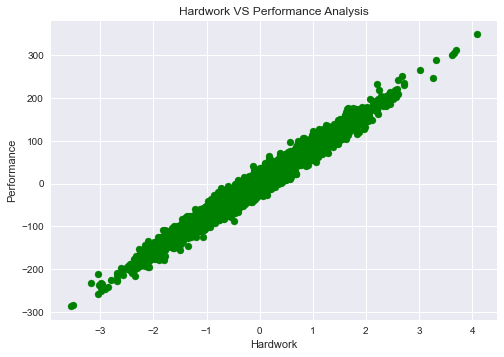

In [4]:
plt.style.use('seaborn')
plt.scatter(X,y,c='g')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.title('Hardwork VS Performance Analysis')
plt.show()

In [5]:
X.shape , y.shape

((3750, 1), (3750, 1))

In [6]:
type(X)

pandas.core.frame.DataFrame

In [7]:
X = X.values
y = y.values

In [8]:
type(X)

numpy.ndarray

In [9]:
u = X.mean()
std = X.std()

In [10]:
print(u,std)

-0.03779466168006854 0.9920801322508517


  ## Section 2 - Linear Regression

In [11]:
def hypothesis(x,theta):
    # theta = [thete0 , theta1]
    y_ =  theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m =X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        x = X[i]
        y = Y[i]
        y_ = hypothesis(x,theta)
        
        
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
        
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
    return total_error/m
    
def gradientDescent(X,Y,max_steps=100,lr=0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0] =theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
        theta_list.append((theta[0],theta[1]))
        
    return theta,error_list,theta_list
    

In [12]:
theta,error_list,theta_list = gradientDescent(X,y)

In [13]:
theta

array([ 3.72687896, 80.54086647])

In [14]:
error_list

[array([6576.35005246]),
 array([5382.10116306]),
 array([4411.49946152]),
 array([3622.60756627]),
 array([2981.36244807]),
 array([2460.09492819]),
 array([2036.32790862]),
 array([1691.80078718]),
 array([1411.67742971]),
 array([1183.90311642]),
 array([998.68240386]),
 array([848.05513558]),
 array([725.55212733]),
 array([625.91553452]),
 array([544.87173451]),
 array([478.94684832]),
 array([425.31688589]),
 array([381.68600791]),
 array([346.18762175]),
 array([317.30402305]),
 array([293.8011006]),
 array([274.67527734]),
 array([259.1103913]),
 array([246.44265199]),
 array([236.13215782]),
 array([227.7397446]),
 array([220.90816592]),
 array([215.34679392]),
 array([210.819181]),
 array([207.13294679]),
 array([204.13155518]),
 array([201.6876277]),
 array([199.69750573]),
 array([198.07682823]),
 array([196.75693483]),
 array([195.6819403]),
 array([194.80635471]),
 array([194.09314753]),
 array([193.51217265]),
 array([193.03888696]),
 array([192.65330781]),
 array([192.3

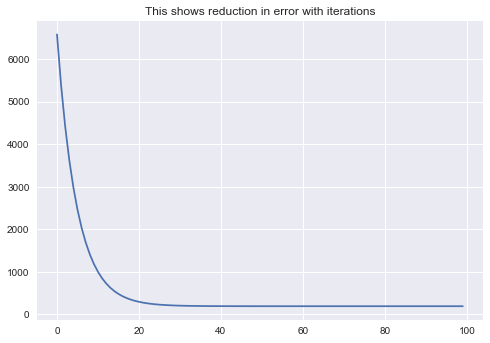

In [15]:
plt.plot(error_list)
plt.title('This shows reduction in error with iterations')
plt.show()

## Section - 3 Prediction and Best Line

In [16]:
y_ = hypothesis(X,theta) 
print(y_)

[[-19.57419108]
 [-43.69635897]
 [ 86.48322254]
 ...
 [-20.85126634]
 [138.69991375]
 [-35.87967507]]


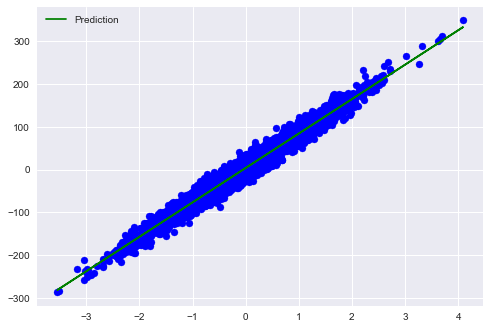

In [17]:
plt.scatter(X,y,c='b')
plt.plot(X,y_,c='g',label="Prediction")
plt.legend()
plt.show()

In [18]:
X_test = pd.read_csv('Linear_X_Test.csv')

In [19]:
y_test = hypothesis(X_test,theta)
y_test.shape
type(y_test)

pandas.core.frame.DataFrame

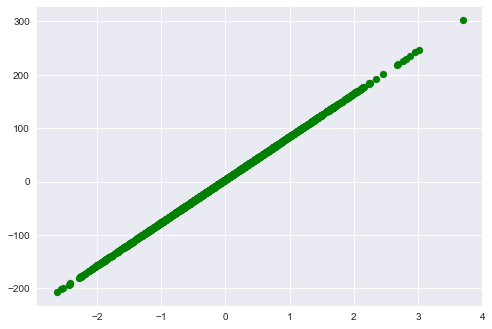

In [20]:
plt.scatter(X_test,y_test,c='g')
plt.show()

In [21]:
y_test.columns = ['y']

In [22]:
y_test.to_csv('Linear_Y_Test.csv',index=False)

## Section-4 Computing Score
- Score : R2 (R-squared) or coefficient of determination

In [23]:
def r2_score(y,y_):
    
    num =  np.sum((y-y_)**2)
    denum = np.sum((y-y.mean())**2)
    score = (1 - num/denum)
    print(score*100)

In [24]:
r2_score(y,y_)

97.09612220841039


## Section 5 Visualising Loss function , Gradient Descent, Theta updates

In [25]:
from mpl_toolkits.mplot3d import Axes3D

In [26]:
theta

array([ 3.72687896, 80.54086647])

In [35]:
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)
T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]): 
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((y - y_)**2)/y.shape[0]
        
print(J)
print(J.shape)

[[3589.28096951 3505.88965864 3424.49834777 ... 3020.15003249
  3090.75872162 3163.36741075]
 [3513.64821294 3430.18131275 3348.71441255 ... 2938.69689802
  3009.22999782 3081.76309763]
 [3439.98675922 3356.4442697  3274.90178018 ... 2859.21506639
  2929.67257688 3002.13008736]
 ...
 [3533.59085392 3444.37916515 3357.16747638 ... 2516.29081869
  2581.07912992 2647.86744115]
 [3609.74841683 3520.46113874 3433.17386065 ... 2586.62800371
  2651.34072562 2718.05344752]
 [3687.8772826  3598.51441518 3511.15154777 ... 2658.93649158
  2723.57362416 2790.21075674]]
(80, 80)


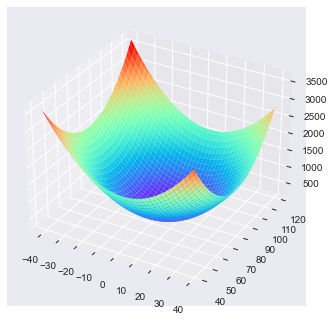

In [36]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

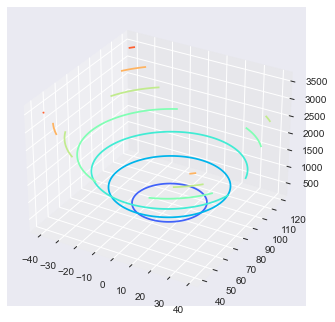

In [37]:
#contour plot
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

In [38]:
theta_list

array([[6.83868968e-02, 7.92470475e+00],
       [1.59886257e-01, 1.50685683e+01],
       [2.69235673e-01, 2.15086418e+01],
       [3.91990186e-01, 2.73143617e+01],
       [5.24411770e-01, 3.25483040e+01],
       [6.63372704e-01, 3.72668626e+01],
       [8.06271177e-01, 4.15208609e+01],
       [9.50957645e-01, 4.53561033e+01],
       [1.09567064e+00, 4.88138714e+01],
       [1.23898084e+00, 5.19313710e+01],
       [1.37974252e+00, 5.47421355e+01],
       [1.51705121e+00, 5.72763885e+01],
       [1.65020716e+00, 5.95613715e+01],
       [1.77868353e+00, 6.16216381e+01],
       [1.90209897e+00, 6.34793198e+01],
       [2.02019391e+00, 6.51543652e+01],
       [2.13281013e+00, 6.66647559e+01],
       [2.23987321e+00, 6.80267004e+01],
       [2.34137740e+00, 6.92548093e+01],
       [2.43737276e+00, 7.03622530e+01],
       [2.52795414e+00, 7.13609042e+01],
       [2.61325174e+00, 7.22614656e+01],
       [2.69342323e+00, 7.30735854e+01],
       [2.76864695e+00, 7.38059615e+01],
       [2.839116

In [39]:
# plot the change in values of theta

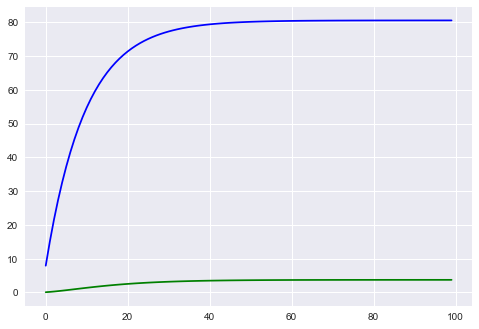

In [40]:
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0],label = "Theta0",c='g')
plt.plot(theta_list[:,1],label = "Theta1",c='b')
plt.legend
plt.show()

## Trajectory traced by theta updates in loss function

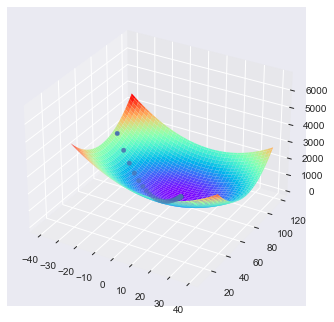

In [42]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

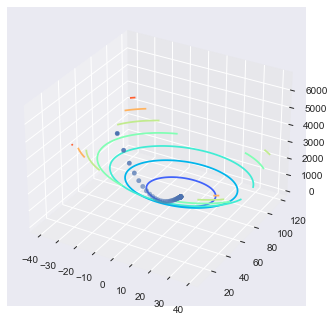

In [43]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

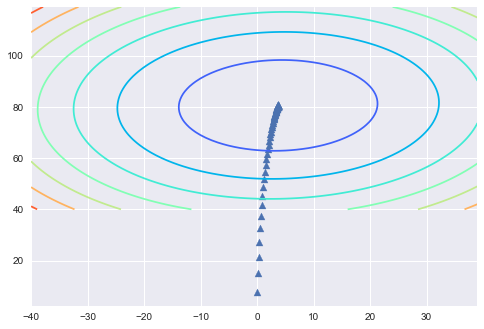

In [47]:
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],marker='^')
plt.show()

In [49]:
theta_list
np.save('Thetalist.npy',theta_list)